In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns" , None)

In [2]:
messages = pd.read_csv("C:\oasis\spam.csv" , encoding= 'cp1252')

In [3]:
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
messages.shape

(5572, 5)

# 1. Data cleaning and Preprocessing

In [5]:
messages.isnull().sum()[messages.isnull().sum()>0]

Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
messages = messages.iloc[:,[0,1]]

In [7]:
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages.rename(columns={'v1' : 'Label' , 'v2':'Message'} , inplace=True)

In [9]:
messages.head(3)

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [10]:
messages.Label.value_counts()

Label
ham     4825
spam     747
Name: count, dtype: int64

In [11]:
messages.Label.replace({'spam':1 , 'ham':0} , inplace=True)

In [12]:
messages.Label.value_counts()

Label
0    4825
1     747
Name: count, dtype: int64

In [14]:
#convert it in  lower case whole data 
messages.Message = messages.Message.str.lower()

messages.Message

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: Message, Length: 5572, dtype: object

In [19]:
import nltk
from nltk.corpus import stopwords
import string

In [18]:
l1 = stopwords.words('english')

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def text_process(mess):
    """
    1. removes punctuations
    2. remove stopwords
    3. return the list of clean text words
    """
    nonpunc = [ char for char in mess if char  not in string.punctuation]
    nonpunc = "".join(nonpunc)
    
    return[word for word in nonpunc.split() if word not in l1]

# TDM - Term Document Matrix

In [22]:
from sklearn.feature_extraction.text import CountVectorizer # CountVectorizer provides unique id to each words

In [23]:
messages_count = CountVectorizer(analyzer= text_process).fit(messages['Message'])

In [24]:
messages_count.vocabulary_  #we can see how many words appear how many times

{'go': 3748,
 'jurong': 4644,
 'point': 6376,
 'crazy': 2463,
 'available': 1375,
 'bugis': 1840,
 'n': 5624,
 'great': 3845,
 'world': 9107,
 'la': 4803,
 'e': 2988,
 'buffet': 1838,
 'cine': 2178,
 'got': 3805,
 'amore': 1142,
 'wat': 8870,
 'ok': 5940,
 'lar': 4842,
 'joking': 4612,
 'wif': 9003,
 'u': 8534,
 'oni': 5972,
 'free': 3539,
 'entry': 3123,
 '2': 415,
 'wkly': 9059,
 'comp': 2294,
 'win': 9017,
 'fa': 3261,
 'cup': 2518,
 'final': 3385,
 'tkts': 8311,
 '21st': 435,
 'may': 5287,
 '2005': 422,
 'text': 8150,
 '87121': 838,
 'receive': 6774,
 'questionstd': 6665,
 'txt': 8518,
 'ratetcs': 6718,
 'apply': 1228,
 '08452810075over18s': 72,
 'dun': 2974,
 'say': 7129,
 'early': 2995,
 'hor': 4175,
 'c': 1889,
 'already': 1116,
 'nah': 5631,
 'dont': 2882,
 'think': 8224,
 'goes': 3762,
 'usf': 8664,
 'lives': 5004,
 'around': 1279,
 'though': 8243,
 'freemsg': 3547,
 'hey': 4071,
 'darling': 2582,
 '3': 520,
 'weeks': 8923,
 'word': 9093,
 'back': 1426,
 'id': 4294,
 'like': 4

In [25]:
df_x = messages_count.transform(messages['Message'])

# created TDM

In [30]:
print("The rows in TDM ---> {}  \n cloumns in TDM --> {} ".format(df_x.shape[0], df_x.shape[1]))
print("Type of the Dataframe ", type(df_x))

The rows in TDM ---> 5572  
 cloumns in TDM --> 9431 
Type of the Dataframe  <class 'scipy.sparse._csr.csr_matrix'>


# 2. Model Building

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , precision_score , classification_report , accuracy_score , recall_score, f1_score

x_train , x_test, y_train  , y_test = train_test_split(df_x , messages.Label ,test_size=.2)

In [39]:
print("shape of train X --->",x_train.shape)
print("shape of train Y --->",y_train.shape)
print("shape of test X --->",x_test.shape)
print("shape of test Y --->",y_test.shape)

shape of train X ---> (4457, 9431)
shape of train Y ---> (4457,)
shape of test X ---> (1115, 9431)
shape of test Y ---> (1115,)


In [40]:
Evaluation_Results = pd.DataFrame(np.zeros((3,4)), columns=['Accuracy', 'Precision','Recall','F1-score'])
Evaluation_Results.index=['Random Forest Classifier (RF)','Decision Tree Classifier (DT)','Naïve Bayes Classifier (NB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score
Random Forest Classifier (RF),0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0


In [47]:
def Classification_Summary(y_test , pred ,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(y_test, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(y_test, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(y_test, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(y_test, pred, average='weighted'),3)*100 #
    print('{}{}\033[1m Evaluating {} \n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}'.format(round(accuracy_score(y_test, pred),3)*100))
    print('F1 Score = {}'.format(round(f1_score(y_test, pred, average='weighted'),3)*100)) #
    print('\n \033[1mConfusiton Matrix:,confusion_matrix(y_test, pred)')
    print('\n\033[1mClassification Report:',classification_report(y_test, pred))

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = MultinomialNB()

# RANDOM FOREST

In [43]:
rf.fit(x_train , y_train)

pred_rf = rf.predict(x_test)

Classification_Summary(y_test , pred_rf ,0)

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 97.0%
F1 Score = 96.89999999999999%

 Confusiton Matrix:
 [[963   0]
 [ 33 119]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       963
           1       1.00      0.78      0.88       152

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



# DECISION TREE

In [48]:
dt.fit(x_train , y_train)

pred_dt = dt.predict(x_test)

Classification_Summary(y_test , pred_dt ,1)

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) 

Accuracy = 96.1
F1 Score = 95.89999999999999

 Confusiton Matrix:,confusion_matrix(y_test, pred)

Classification Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.98       963
           1       0.94      0.76      0.84       152

    accuracy                           0.96      1115
   macro avg       0.95      0.88      0.91      1115
weighted avg       0.96      0.96      0.96      1115



# NAIVE BIAS

In [49]:
nb.fit(x_train , y_train)

pred_nb = nb.predict(x_test)

Classification_Summary(y_test , pred_nb ,2)

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) 

Accuracy = 97.6
F1 Score = 97.6

 Confusiton Matrix:,confusion_matrix(y_test, pred)

Classification Report:               precision    recall  f1-score   support

           0       0.99      0.98      0.99       963
           1       0.88      0.95      0.91       152

    accuracy                           0.98      1115
   macro avg       0.94      0.97      0.95      1115
weighted avg       0.98      0.98      0.98      1115



                                       Algorithms Comparison                                        


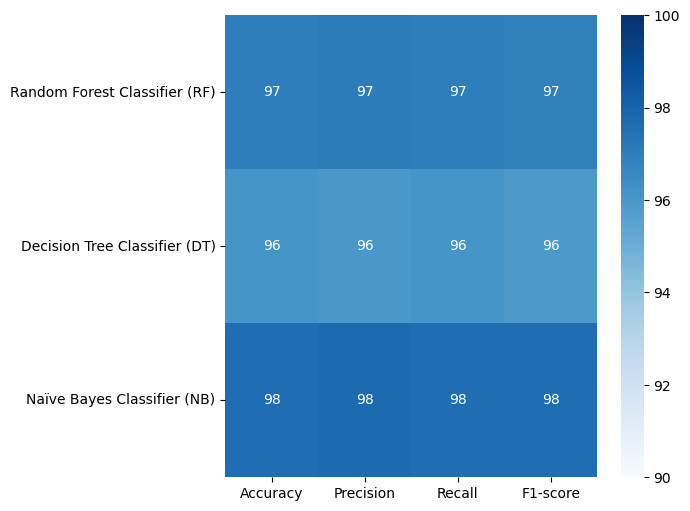

In [53]:
#Comparing all the models Scores

print('Algorithms Comparison'.center(100))
plt.figure(figsize=[6,6])

sns.heatmap(Evaluation_Results, annot=True, vmin=90, vmax=100, cmap='Blues', fmt='.2g')
plt.show()

The best suited model is NAIVE BIAS as we take accuracy as a key metrix

In [78]:
# time in which the messages are converted into sparse matrix

In [55]:
import timeit

start = timeit.default_timer()


text_count = CountVectorizer(analyzer= text_process).fit(messages['Message'])


stop = timeit.default_timer()

execution_time = stop - start

print('Program Executed in',execution_time)

Program Executed in 1.1417034000041895


# CONCLUSIONS

1. We have removed 2 rows.
2. Messages had stopwords and puncutations which are removed after preproceesing.
3. Using Counter Vectorizer we have converted messages in Term Document Mtrix.
4. Naive Bias is the best model as we take accuracy as a key metrix